Adapted from [MultivariateStats.jl](https://juliastats.org/MultivariateStats.jl/stable/pca/).

In [1]:
using BenchmarkTools, RDatasets, Plots

In [2]:
# load iris dataset
iris = dataset("datasets", "iris")

# split half to training set
Xtr = Matrix(iris[1:2:end,1:4])'
Xtr_labels = Vector(iris[1:2:end,5])

# split other half to testing set
Xte = Matrix(iris[2:2:end,1:4])'
Xte_labels = Vector(iris[2:2:end,5]);

# MultivariateStats.jl

## PCA

In [3]:
using MultivariateStats

In [4]:
@benchmark fit(PCA, Xtr; maxoutdim=3)

BenchmarkTools.Trial: 10000 samples with 4 evaluations.
 Range (min … max):   7.920 μs …  2.655 ms  ┊ GC (min … max): 0.00% … 98.46%
 Time  (median):      8.887 μs              ┊ GC (median):    0.00%
 Time  (mean ± σ):   13.532 μs ± 50.697 μs  ┊ GC (mean ± σ):  5.58% ±  2.34%

  █▇▆▅▄▃▃▂▁▁▂▃▃▃▂▁▁                                           ▁
  ████████████████████████████▇▇▇█▇▆▆▇▆▅▆▅▆▆▆▅▅▅▆▅▆▅▆▅▄▅▆▅▄▅▄ █
  7.92 μs      Histogram: log(frequency) by time      42.6 μs <

 Memory estimate: 6.50 KiB, allocs estimate: 37.

In [5]:
@benchmark predict(M, Xte) setup=(M=fit(PCA, Xtr; maxoutdim=3))

BenchmarkTools.Trial: 10000 samples with 10 evaluations.
 Range (min … max):  1.147 μs … 761.339 μs  ┊ GC (min … max):  0.00% … 98.69%
 Time  (median):     1.331 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   2.177 μs ±  13.998 μs  ┊ GC (mean ± σ):  16.26% ±  2.94%

  ██▇▅▃▂▂▂▃▃▃▃▃▃▂▁▁           ▁                               ▂
  ████████████████████▇▆▆▇▇▇▇███▇▇▇▇███▇▆▆▆▅▅▆▅▄▅▅▅▅▄▅▄▄▅▃▅▅▅ █
  1.15 μs      Histogram: log(frequency) by time      6.52 μs <

 Memory estimate: 4.56 KiB, allocs estimate: 5.

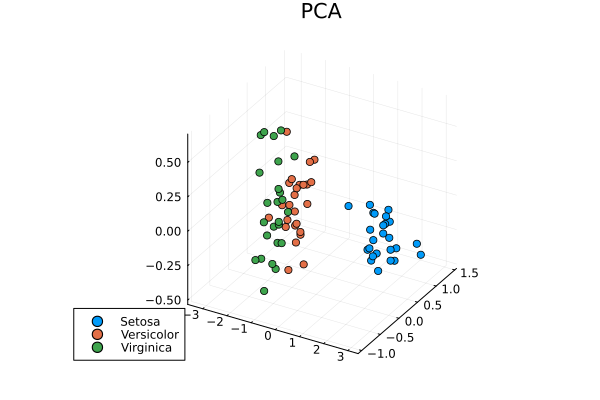

In [6]:
function plot_compression(Yte, title)
    setosa_Y = Yte[:, Xte_labels .== "setosa"]
    versicolor_Y = Yte[:, Xte_labels .== "versicolor"]
    virginica_Y = Yte[:, Xte_labels .== "virginica"]
    p = scatter(setosa_Y[1, :], setosa_Y[2, :], setosa_Y[3, :], marker=:circle, linewidth=0, label="Setosa")
    scatter!(versicolor_Y[1, :], versicolor_Y[2, :], versicolor_Y[3, :], marker=:circle, linewidth=0, label="Versicolor")
    scatter!(virginica_Y[1, :], virginica_Y[2, :], virginica_Y[3, :], marker=:circle, linewidth=0, label="Virginica")
    plot!(p, title=title)
    return p
end

M = fit(PCA, Xtr; maxoutdim=3)
pca_pred = predict(M, Xte)
p1 = plot_compression(pca_pred, "PCA")

# ExpFamilyPCA

## PoissonEPCA

In [7]:
using ExpFamilyPCA

In [8]:
@benchmark PoissonEPCA()

BenchmarkTools.Trial: 10000 samples with 1000 evaluations.
 Range (min … max):   6.447 ns …  2.618 μs  ┊ GC (min … max):  0.00% … 97.87%
 Time  (median):      7.461 ns              ┊ GC (median):     0.00%
 Time  (mean ± σ):   12.292 ns ± 68.044 ns  ┊ GC (mean ± σ):  16.90% ±  3.08%

  ▇█▆▅▃▂▂▂▁                      ▁▁  ▁                        ▂
  ███████████▇▇▇▆▅▆▆▆▆▆▆▆▆▄▅▄▅▇▇██████▇▅▆▅▆▇▇▆▇▆▇▆▆▅▆▇▇▇▅▆▅▄▅ █
  6.45 ns      Histogram: log(frequency) by time      43.2 ns <

 Memory estimate: 48 bytes, allocs estimate: 1.

In [9]:
Xtr_transpose = Xtr'
@benchmark fit!(poisson, Xtr_transpose; maxoutdim=3, verbose=false, maxiter=50) setup=(poisson=PoissonEPCA())

BenchmarkTools.Trial: 2 samples with 1 evaluation.
 Range (min … max):  3.680 s … 5.568 s  ┊ GC (min … max): 5.12% … 4.09%
 Time  (median):     4.624 s            ┊ GC (median):    4.50%
 Time  (mean ± σ):   4.624 s ± 1.335 s  ┊ GC (mean ± σ):  4.50% ± 0.73%

  █                                                     █  
  █▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  3.68 s        Histogram: frequency by time       5.57 s <

 Memory estimate: 1.42 GiB, allocs estimate: 1201866.

In [10]:
poisson = PoissonEPCA()
fit!(poisson, Xtr_transpose; maxoutdim=3, verbose=true, maxiter=50)'

Iteration: 1/50 | Loss: 50.666060438300995
Iteration: 10/50 | Loss: 4.625855594711395
Iteration: 20/50 | Loss: 3.519002794344326
Iteration: 30/50 | Loss: 3.164566443003272
Iteration: 40/50 | Loss: 3.002771480502954
Iteration: 50/50 | Loss: 2.855615251963713


3×75 adjoint(::Matrix{Float64}) with eltype Float64:
 0.923188  0.913917  0.92129  …  1.01827   1.04163  1.01696  1.03274
 1.05654   1.04342   1.04729     0.998606  1.00611  1.00809  1.00071
 1.65296   1.09185   1.64053     1.65228   1.66713  1.06961  1.65595

In [11]:
Xte_transpose = Xte'
@benchmark compress(poisson, Xte_transpose; maxiter=100)

BenchmarkTools.Trial: 1 sample with 1 evaluation.
 Single result which took 5.700 s (4.18% GC) to evaluate,
 with a memory estimate of 1.68 GiB, over 1284808 allocations.

In [12]:
poisson_pred = compress(poisson, Xte_transpose; verbose=true, maxiter=50)'

Iteration: 1/50 | Loss: 37.74541142743515
Iteration: 10/50 | Loss: 10.500351745072663
Iteration: 20/50 | Loss: 6.83847834739949
Iteration: 30/50 | Loss: 6.5128208721650065
Iteration: 40/50 | Loss: 6.5128208721650065
Iteration: 50/50 | Loss: 6.5128208721650065


3×75 adjoint(::Matrix{Float64}) with eltype Float64:
 0.959203  0.95798  0.956933  0.95951  …  1.00733   1.00925  1.00877  1.00882
 1.11076   1.10849  1.09402   1.10989     0.995332  1.00354  1.00667  1.00897
 1.13222   1.13252  1.73552   1.13725     1.12288   1.10116  1.10549  1.11015

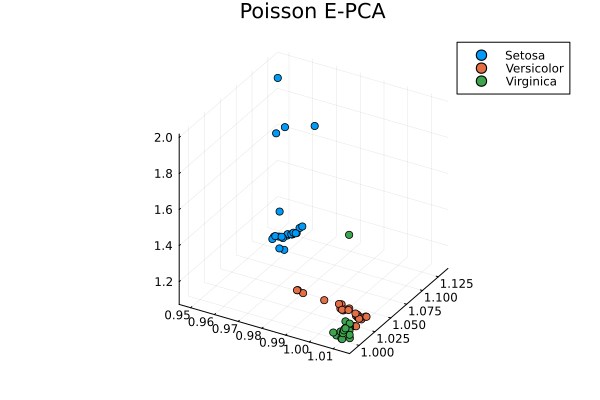

In [13]:
p2 = plot_compression(poisson_pred, "Poisson E-PCA")

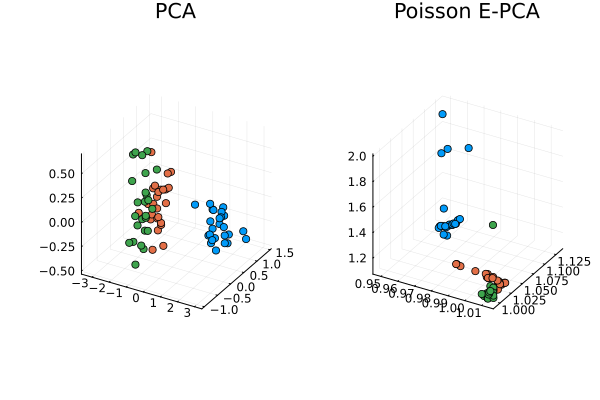

In [14]:
plot(p1, p2, layout=(1, 2), legend=false)

Now, let's see how PCA and Poisson E-PCA fair on reconstruction.

In [15]:
@benchmark reconstruct(M, pca_pred)

BenchmarkTools.Trial: 10000 samples with 19 evaluations.
 Range (min … max):  1.031 μs … 723.307 μs  ┊ GC (min … max):  0.00% … 98.95%
 Time  (median):     1.335 μs               ┊ GC (median):     0.00%
 Time  (mean ± σ):   2.551 μs ±  24.749 μs  ┊ GC (mean ± σ):  43.63% ±  4.54%

  ▅▆▃▁▂█▆                                                     ▁
  ████████▇▆▇▆▇▆▇▇▆▇▆▆▆▆▆▆▆▆▇▇▆▇███▇▇██▇▆▆▆▆▅▆▆▅▄▃▄▅▅▄▄▃▂▃▃▃▄ █
  1.03 μs      Histogram: log(frequency) by time      4.22 μs <

 Memory estimate: 5.00 KiB, allocs estimate: 2.

In [16]:
Xr_PCA = reconstruct(M, pca_pred)

4×75 Matrix{Float64}:
 4.86449  4.61087   5.40782   5.00775   …  6.79346  6.58825  6.46774  5.94384
 3.04262  3.08695   3.89061   3.39069      3.20785  3.13416  3.03873  2.94737
 1.46099  1.48132   1.68656   1.48668      5.91124  5.39197  5.25542  5.02469
 0.10362  0.229519  0.421233  0.221041     2.28224  1.99665  1.91243  1.91901

In [17]:
poisson_pred_transpose = poisson_pred'
@benchmark decompress(poisson, poisson_pred_transpose)

BenchmarkTools.Trial: 10000 samples with 10 evaluations.
 Range (min … max):  1.837 μs …  1.202 ms  ┊ GC (min … max):  0.00% … 99.19%
 Time  (median):     2.198 μs              ┊ GC (median):     0.00%
 Time  (mean ± σ):   3.782 μs ± 30.692 μs  ┊ GC (mean ± σ):  25.00% ±  3.13%

  ▇▆█▆▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▂▁▁▁▁                                 ▂
  ████████████████████████████▇█▇▇▆▇▇▆▆▆▆▆▅▆▆▆▆▆▆▅▄▅▄▄▅▅▃▄▃▄ █
  1.84 μs      Histogram: log(frequency) by time     9.55 μs <

 Memory estimate: 5.00 KiB, allocs estimate: 2.

In [18]:
Xr_poisson = decompress(poisson, poisson_pred')'

4×75 adjoint(::Matrix{Float64}) with eltype Float64:
 5.35428   5.34446   5.28477   5.35921  …  6.25256  6.26205  6.2468   6.241
 3.37934   3.37095   3.83805   3.37797     2.68676  2.70284  2.72052  2.7336
 1.40533   1.41345   1.38653   1.41743     5.34205  5.13144  4.98373  4.89515
 0.194805  0.197473  0.220874  0.1979      1.87654  1.72827  1.64385  1.5934

In [19]:
pca_absolute_error = sum(abs.(Xr_PCA .- Xte))
poisson_absolute_error = sum(abs.(Xr_poisson .- Xte))

println("PCA Absolute Error: ", pca_absolute_error)
println("Poisson Absolute Error: ", poisson_absolute_error)

PCA Absolute Error: 18.37633501091988
Poisson Absolute Error: 87.53333627105732


Both, reconstruct the data nearly instantly.

## Implicit Poisson

One of the main features of ExpFamilyPCA.jl is the ability to induce a custom E-PCA objective from a user-provided convex function $G$. For example, to induce the Poisson E-PCA objective, we set $G = \exp(x)$. While this method is convenient for experimenting with different $G$ and link functinos, it is often slower than an explicit model that defines the Bregman divergence.

In [20]:
@benchmark EPCA(x->exp(x))

BenchmarkTools.Trial: 1586 samples with 1 evaluation.
 Range (min … max):  1.146 ms … 18.156 ms  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     3.046 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   3.134 ms ±  1.081 ms  ┊ GC (mean ± σ):  0.43% ± 2.72%

               ▁ ▁▃▁▆▄▅▇▃█▆█▃█▂▅▁ ▁▂▁▁                        
  ▆▄▄▃▄▅▂▄▅▄▅▆▆██████████████████▇█████▆▆▇▅▆▆▅▄▅▃▃▂▃▃▃▂▂▃▂▂▁ ▄
  1.15 ms        Histogram: frequency by time        5.55 ms <

 Memory estimate: 67.65 KiB, allocs estimate: 1221.

In [21]:
@benchmark fit!(implicit_poisson, Xtr_transpose; maxoutdim=3, maxiter=50) setup=(implicit_poisson=EPCA(x->exp(x)))

BenchmarkTools.Trial: 2 samples with 1 evaluation.
 Range (min … max):  3.369 s …    3.797 s  ┊ GC (min … max): 17.15% … 15.97%
 Time  (median):     3.583 s               ┊ GC (median):    16.53%
 Time  (mean ± σ):   3.583 s ± 303.032 ms  ┊ GC (mean ± σ):  16.53% ±  0.84%

  █                                                        █  
  █▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  3.37 s         Histogram: frequency by time          3.8 s <

 Memory estimate: 3.13 GiB, allocs estimate: 1919142.

In [22]:
implicit_poisson = EPCA(x->exp(x))
fit!(implicit_poisson, Xtr_transpose; maxoutdim=3, verbose=true, maxiter=50)'

Iteration: 1/50 | Loss: 50.666060438301024
Iteration: 10/50 | Loss: 4.625855594711423
Iteration: 20/50 | Loss: 3.519002794344345
Iteration: 30/50 | Loss: 3.16456644300329
Iteration: 40/50 | Loss: 3.0027714805029695
Iteration: 50/50 | Loss: 2.855615251963724


3×75 adjoint(::Matrix{Float64}) with eltype Float64:
 0.923188  0.913917  0.92129  …  1.01827   1.04163  1.01696  1.03274
 1.05654   1.04342   1.04729     0.998606  1.00611  1.00809  1.00071
 1.65296   1.09185   1.64053     1.65228   1.66713  1.06961  1.65595

In [23]:
@benchmark compress(implicit_poisson, Xte_transpose; maxiter=50)

BenchmarkTools.Trial: 2 samples with 1 evaluation.
 Range (min … max):  2.734 s …   2.820 s  ┊ GC (min … max): 12.25% … 12.06%
 Time  (median):     2.777 s              ┊ GC (median):    12.15%
 Time  (mean ± σ):   2.777 s ± 60.523 ms  ┊ GC (mean ± σ):  12.15% ±  0.14%

  █                                                       █  
  █▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  2.73 s         Histogram: frequency by time        2.82 s <

 Memory estimate: 1.79 GiB, allocs estimate: 1042526.

In [24]:
implicit_poisson_pred = compress(implicit_poisson, Xte_transpose; verbose=true, maxiter=50)'

Iteration: 1/50 | Loss: 37.74541142743516
Iteration: 10/50 | Loss: 10.500351745072681
Iteration: 20/50 | Loss: 6.838478347399516
Iteration: 30/50 | Loss: 6.512820872165022
Iteration: 40/50 | Loss: 6.512820872165022
Iteration: 50/50 | Loss: 6.512820872165022


3×75 adjoint(::Matrix{Float64}) with eltype Float64:
 0.959203  0.95798  0.956933  0.95951  …  1.00733   1.00925  1.00877  1.00882
 1.11076   1.10849  1.09402   1.10989     0.995332  1.00354  1.00667  1.00897
 1.13222   1.13252  1.73552   1.13725     1.12288   1.10116  1.10549  1.11015

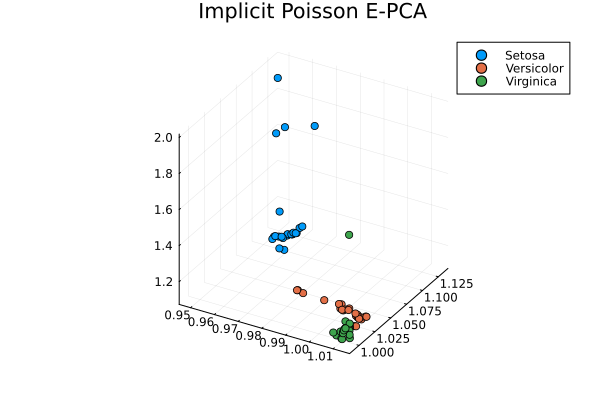

In [25]:
p3 = plot_compression(implicit_poisson_pred, "Implicit Poisson E-PCA")

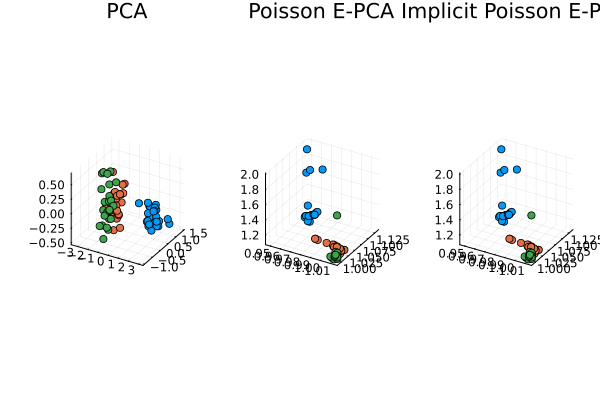

In [26]:
plot(p1, p2, p3, layout=(1, 3), legend=false)